# Plot loss and validity curves in epochs

200 200


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


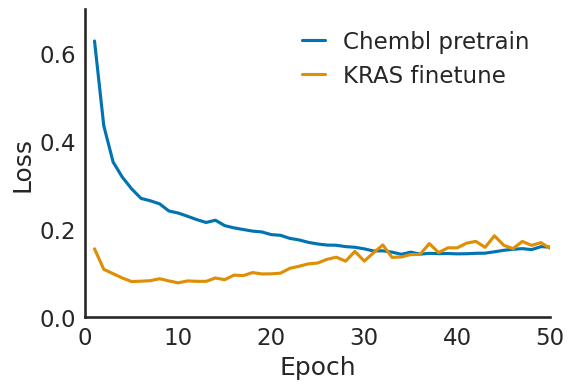

In [1]:
import pandas as pd
from loguru import logger
from utils import plot_style_utils

loss_chembl = pd.read_csv('result/prior/loss_chembl_5.0.csv')
loss_tune = pd.read_csv('result/prior/loss_kras_tune_5.0.csv')

print(len(loss_chembl), len(loss_tune))

plot_style_utils.set_pub_plot_context(context="talk")
fig, ax = plot_style_utils.simple_ax()
plot_style_utils.prettify_ax(ax)


ax.plot(loss_chembl['Step'], loss_chembl['Value'], label='Chembl pretrain', color=plot_style_utils.CAT_PALETTE[0])
ax.plot(loss_tune['Step'], loss_tune['Value'], label='KRAS finetune', color=plot_style_utils.CAT_PALETTE[1])
ax.set_xlim(0, 50)
ax.set_ylim(0, 0.7)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend(loc='upper right', frameon=False, handlelength=1)
plot_style_utils.save_for_pub(fig=fig, path='figures/kras_kd/prior_loss')

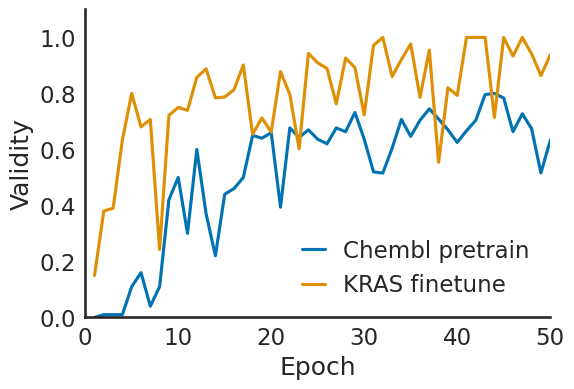

In [2]:
validity_chembl = pd.read_csv('result/prior/valid_chembl_5.0.csv')
validity_tune = pd.read_csv('result/prior/valid_kras_tune_5.0.csv')

fig, ax = plot_style_utils.simple_ax()
plot_style_utils.set_pub_plot_context(context="talk")
plot_style_utils.prettify_ax(ax)

ax.plot(validity_chembl['Step'], validity_chembl['Value'], label='Chembl pretrain', color=plot_style_utils.CAT_PALETTE[0])
ax.plot(validity_tune['Step'], validity_tune['Value'], label='KRAS finetune', color=plot_style_utils.CAT_PALETTE[1])
ax.set_xlim(0, 50)
ax.set_ylim(0, 1.1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Validity')
ax.legend(loc='lower right', frameon=False, handlelength=1)

plot_style_utils.save_for_pub(fig=fig, path='figures/kras_kd/prior_validity')

# Calculate Prior metrics and Plots

In [3]:
import pickle

with open('result/prior/kras_kd_priors.pkl', 'rb') as f:
    train_result, train_sa, train_kras, train_perm, \
    prior_result, prior_sa, prior_kras, prior_perm, \
    prior_tune_result, prior_tune_sa, prior_tune_kras, prior_tune_perm, \
    prior_final_result, prior_final_sa, prior_final_kras, prior_final_perm = pickle.load(f)

## Permeability

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


x range: -10.0 -5.235718785218051


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


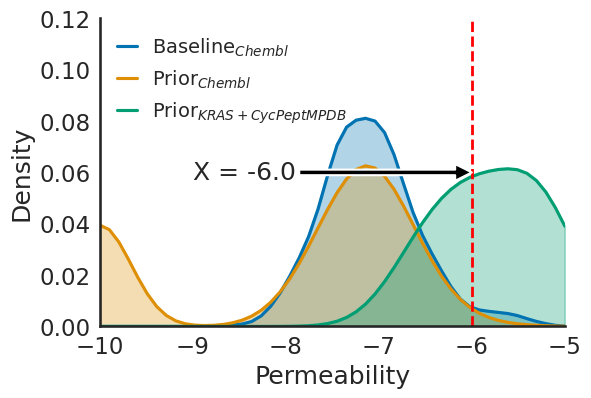

In [4]:
import numpy as np
from utils import plot_style_utils
import scipy.stats as stats

fig, ax = plot_style_utils.simple_ax()
plot_style_utils.set_pub_plot_context(context="talk")
plot_style_utils.prettify_ax(ax)

x_min = min(np.min(train_perm), np.min(prior_perm), np.min(prior_tune_perm))
x_max = max(np.max(train_perm), np.max(prior_perm), np.max(prior_tune_perm))

print('x range:', x_min, x_max)
x = np.linspace(-10, -5, 50)

y1 = stats.gaussian_kde(train_perm)(x)/sum(stats.gaussian_kde(train_perm)(x))
ax.plot(x, y1, color=plot_style_utils.CAT_PALETTE[0], label='Baseline$_{Chembl}$')
ax.fill_between(x, 0, y1, alpha=0.3, color=plot_style_utils.CAT_PALETTE[0])

y2 = stats.gaussian_kde(prior_perm)(x)/sum(stats.gaussian_kde(prior_perm)(x))
ax.plot(x, y2, color=plot_style_utils.CAT_PALETTE[1], label='Prior$_{Chembl}$')
ax.fill_between(x, 0, y2, alpha=0.3, color=plot_style_utils.CAT_PALETTE[1])

y3 = stats.gaussian_kde(prior_tune_perm)(x)/sum(stats.gaussian_kde(prior_tune_perm)(x))
ax.plot(x, y3, color=plot_style_utils.CAT_PALETTE[2], label='Prior$_{KRAS+CycPeptMPDB}$')
ax.fill_between(x, 0, y3, alpha=0.3, color=plot_style_utils.CAT_PALETTE[2])

# draw vertical lines from x=-6.0
ax.vlines(x=-6.0, ymin=0, ymax=0.32, color='red', linestyle='--', linewidth=2)
ax.annotate('X = -6.0', xy=(-6.0, 0.06), xytext=(-9.0, 0.06),
            arrowprops=dict(facecolor='black'), verticalalignment="center",)

ax.legend(loc='upper left', frameon=False, fontsize=14, handlelength=1)
ax.set_xlim(-10, -5)
ax.set_ylim(0, 0.12)
ax.set_xlabel('Permeability')
ax.set_ylabel('Density')

plot_style_utils.save_for_pub(fig=fig, path='figures/kras_kd/prior_perm')

## Synthetic accessibilty

x range: 0.28 0.97


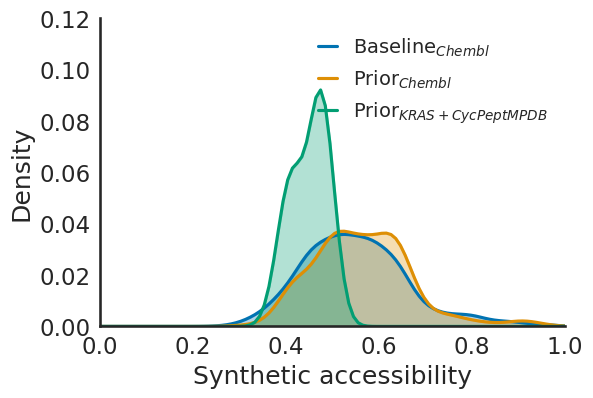

In [5]:
from utils import plot_style_utils
import scipy.stats as stats

fig, ax = plot_style_utils.simple_ax()
plot_style_utils.set_pub_plot_context(context="talk")
plot_style_utils.prettify_ax(ax)

x_min = min(np.min(train_sa), np.min(prior_sa), np.min(prior_tune_sa))
x_max = max(np.max(train_sa), np.max(prior_sa), np.max(prior_tune_sa))

print('x range:', x_min, x_max)
x = np.linspace(0, 1, 100)

y1 = stats.gaussian_kde(train_sa)(x)/sum(stats.gaussian_kde(train_sa)(x))
ax.plot(x, y1, color=plot_style_utils.CAT_PALETTE[0], label='Baseline$_{Chembl}$')
ax.fill_between(x, 0, y1, alpha=0.3, color=plot_style_utils.CAT_PALETTE[0])

y2 = stats.gaussian_kde(prior_sa)(x)/sum(stats.gaussian_kde(prior_sa)(x))
ax.plot(x, y2, color=plot_style_utils.CAT_PALETTE[1], label='Prior$_{Chembl}$')
ax.fill_between(x, 0, y2, alpha=0.3, color=plot_style_utils.CAT_PALETTE[1])

y3 = stats.gaussian_kde(prior_tune_sa)(x)/sum(stats.gaussian_kde(prior_tune_sa)(x))
ax.plot(x, y3, color=plot_style_utils.CAT_PALETTE[2], label='Prior$_{KRAS+CycPeptMPDB}$')
ax.fill_between(x, 0, y3, alpha=0.3, color=plot_style_utils.CAT_PALETTE[2])

ax.legend(loc='upper right', frameon=False, fontsize=14, handlelength=1)
ax.set_xlim(0, 1)
ax.set_ylim(0, 0.12)
ax.set_xlabel('Synthetic accessibility')
ax.set_ylabel('Density')

plot_style_utils.save_for_pub(fig=fig, path='figures/kras_kd/prior_sa_dist')

## KRAS Kd

x range: 0.29321083426475525 5.0


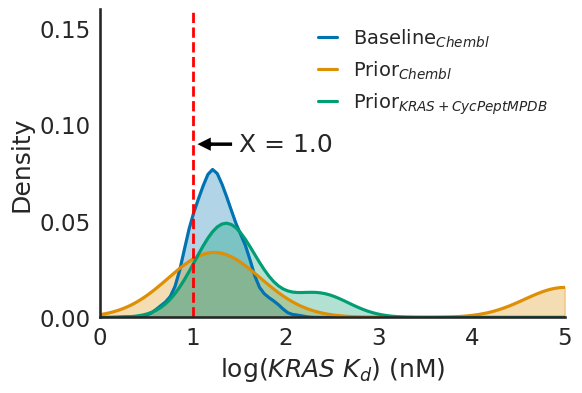

In [6]:
from utils import plot_style_utils
import scipy.stats as stats

fig, ax = plot_style_utils.simple_ax()
plot_style_utils.set_pub_plot_context(context="talk")
plot_style_utils.prettify_ax(ax)

x_min = min(np.min(train_kras), np.min(prior_kras), np.min(prior_tune_kras))
x_max = max(np.max(train_kras), np.max(prior_kras), np.max(prior_tune_kras))

print('x range:', x_min, x_max)
x = np.linspace(0, 5, 100)

y1 = stats.gaussian_kde(train_kras)(x)/sum(stats.gaussian_kde(train_kras)(x))
ax.plot(x, y1, color=plot_style_utils.CAT_PALETTE[0], label='Baseline$_{Chembl}$')
ax.fill_between(x, 0, y1, alpha=0.3, color=plot_style_utils.CAT_PALETTE[0])

y2 = stats.gaussian_kde(prior_kras)(x)/sum(stats.gaussian_kde(prior_kras)(x))
ax.plot(x, y2, color=plot_style_utils.CAT_PALETTE[1], label='Prior$_{Chembl}$')
ax.fill_between(x, 0, y2, alpha=0.3, color=plot_style_utils.CAT_PALETTE[1])

y3 = stats.gaussian_kde(prior_tune_kras)(x)/sum(stats.gaussian_kde(prior_tune_kras)(x))
ax.plot(x, y3, color=plot_style_utils.CAT_PALETTE[2], label='Prior$_{KRAS+CycPeptMPDB}$')
ax.fill_between(x, 0, y3, alpha=0.3, color=plot_style_utils.CAT_PALETTE[2])

# draw vertical lines from x=1.0
ax.vlines(x=1, ymin=0, ymax=0.16, color='red', linestyle='--', linewidth=2)
ax.annotate('X = 1.0', xy=(1.0, 0.09), xytext=(2.0, 0.09),
            arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment="center", verticalalignment="center",)

ax.legend(loc='upper right', frameon=False, fontsize=14, handlelength=1)
ax.set_xlim(0, 5)
ax.set_ylim(0, 0.16)
ax.set_xlabel('$\log (KRAS\ K_d)$ (nM)')
ax.set_ylabel('Density')

plot_style_utils.save_for_pub(fig=fig, path='figures/kras_kd/prior_kras_kd_dist')

# Agent plots

In [7]:
with open('result/agent/kras_kd/kras_kd_agent.pkl', 'rb') as f:
    agent_final_result, agent_final_sa, agent_final_kras, agent_final_perm = pickle.load(f)

## KRAS Kd

x range: -0.8976626396179199 5.0


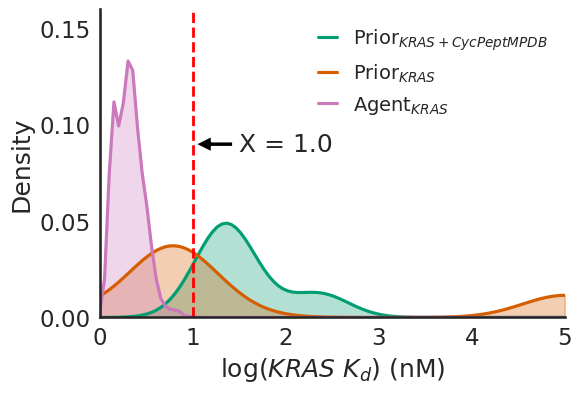

In [8]:
from utils import plot_style_utils
import scipy.stats as stats

fig, ax = plot_style_utils.simple_ax()
plot_style_utils.set_pub_plot_context(context="talk")
plot_style_utils.prettify_ax(ax)

x_min = min(np.min(prior_tune_kras), np.min(prior_final_kras), np.min(agent_final_kras))
x_max = max(np.max(prior_tune_kras), np.max(prior_final_kras), np.max(agent_final_kras))

print('x range:', x_min, x_max)
x = np.linspace(0, 5, 100)

y1 = stats.gaussian_kde(prior_tune_kras)(x)/sum(stats.gaussian_kde(prior_tune_kras)(x))
ax.plot(x, y1, color=plot_style_utils.CAT_PALETTE[2], label='Prior$_{KRAS+CycPeptMPDB}$')
ax.fill_between(x, 0, y1, alpha=0.3, color=plot_style_utils.CAT_PALETTE[2])

y2 = stats.gaussian_kde(prior_final_kras)(x)/sum(stats.gaussian_kde(prior_final_kras)(x))
ax.plot(x, y2, color=plot_style_utils.CAT_PALETTE[3], label='Prior$_{KRAS}$')
ax.fill_between(x, 0, y2, alpha=0.3, color=plot_style_utils.CAT_PALETTE[3])

y3 = stats.gaussian_kde(agent_final_kras)(x)/sum(stats.gaussian_kde(agent_final_kras)(x))
ax.plot(x, y3, color=plot_style_utils.CAT_PALETTE[4], label='Agent$_{KRAS}$')
ax.fill_between(x, 0, y3, alpha=0.3, color=plot_style_utils.CAT_PALETTE[4])

# draw vertical lines from x=1.0
ax.vlines(x=1, ymin=0, ymax=0.16, color='red', linestyle='--', linewidth=2)
ax.annotate('X = 1.0', xy=(1.0, 0.09), xytext=(2.0, 0.09),
            arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment="center", verticalalignment="center",)

ax.legend(loc='upper right', frameon=False, fontsize=14, handlelength=1)
ax.set_xlim(0, 5)
ax.set_ylim(0, 0.16)
ax.set_xlabel('$\log (KRAS\ K_d)$ (nM)')
ax.set_ylabel('Density')

plot_style_utils.save_for_pub(fig=fig, path='figures/kras_kd/agent_kras_kd_dist')

## Synthetic accessibility

x range: 0.28 0.95


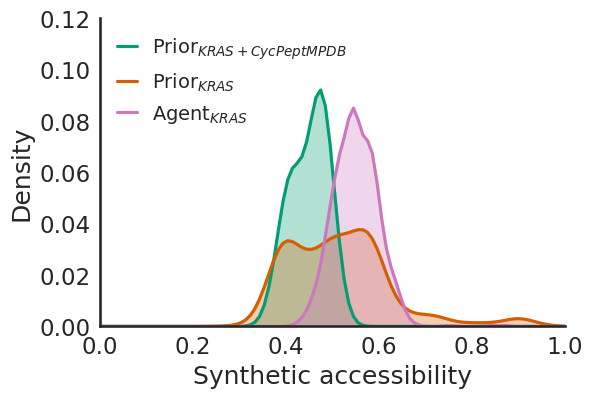

In [9]:
from utils import plot_style_utils
import scipy.stats as stats

plot_style_utils.set_pub_plot_context(context="talk")
fig, ax = plot_style_utils.simple_ax()
plot_style_utils.prettify_ax(ax)

x_min = min(np.min(prior_tune_sa), np.min(prior_final_sa), np.min(agent_final_sa))
x_max = max(np.max(prior_tune_sa), np.max(prior_final_sa), np.max(agent_final_sa))

print('x range:', x_min, x_max)
x = np.linspace(0, 1, 100)

y1 = stats.gaussian_kde(prior_tune_sa)(x)/sum(stats.gaussian_kde(prior_tune_sa)(x))
ax.plot(x, y1, color=plot_style_utils.CAT_PALETTE[2], label='Prior$_{KRAS+CycPeptMPDB}$')
ax.fill_between(x, 0, y1, alpha=0.3, color=plot_style_utils.CAT_PALETTE[2])

y2 = stats.gaussian_kde(prior_final_sa)(x)/sum(stats.gaussian_kde(prior_final_sa)(x))
ax.plot(x, y2, color=plot_style_utils.CAT_PALETTE[3], label='Prior$_{KRAS}$')
ax.fill_between(x, 0, y2, alpha=0.3, color=plot_style_utils.CAT_PALETTE[3])

y3 = stats.gaussian_kde(agent_final_sa)(x)/sum(stats.gaussian_kde(agent_final_sa)(x))
ax.plot(x, y3, color=plot_style_utils.CAT_PALETTE[4], label='Agent$_{KRAS}$')
ax.fill_between(x, 0, y3, alpha=0.3, color=plot_style_utils.CAT_PALETTE[4])

ax.legend(loc='upper left', frameon=False, fontsize=14, handlelength=1)
ax.set_xlim(0, 1)
ax.set_ylim(0, 0.12)
ax.set_xlabel('Synthetic accessibility')
ax.set_ylabel('Density')

plot_style_utils.save_for_pub(fig=fig, path='figures/kras_kd/agent_sa_dist')

## Permeability

x range: -10.0 -5.235718785218051


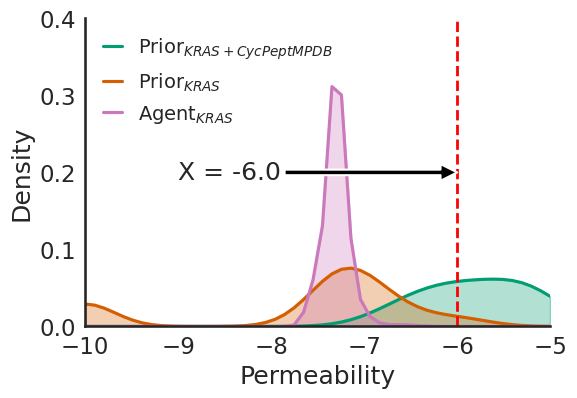

In [10]:
## Plot Permeability distribution curves
from utils import plot_style_utils
import scipy.stats as stats

plot_style_utils.set_pub_plot_context(context="talk")
fig, ax = plot_style_utils.simple_ax()
plot_style_utils.prettify_ax(ax)

x_min = min(np.min(prior_tune_perm), np.min(prior_final_perm), np.min(agent_final_perm))
x_max = max(np.max(prior_tune_perm), np.max(prior_final_perm), np.max(agent_final_perm))

print('x range:', x_min, x_max)
x = np.linspace(-10, -5, 50)

y1 = stats.gaussian_kde(prior_tune_perm)(x)/sum(stats.gaussian_kde(prior_tune_perm)(x))
ax.plot(x, y1, color=plot_style_utils.CAT_PALETTE[2], label='Prior$_{KRAS+CycPeptMPDB}$')
ax.fill_between(x, 0, y1, alpha=0.3, color=plot_style_utils.CAT_PALETTE[2])

y2 = stats.gaussian_kde(prior_final_perm)(x)/sum(stats.gaussian_kde(prior_final_perm)(x))
ax.plot(x, y2, color=plot_style_utils.CAT_PALETTE[3], label='Prior$_{KRAS}$')
ax.fill_between(x, 0, y2, alpha=0.3, color=plot_style_utils.CAT_PALETTE[3])

y3 = stats.gaussian_kde(agent_final_perm)(x)/sum(stats.gaussian_kde(agent_final_perm)(x))
ax.plot(x, y3, color=plot_style_utils.CAT_PALETTE[4], label='Agent$_{KRAS}$')
ax.fill_between(x, 0, y3, alpha=0.3, color=plot_style_utils.CAT_PALETTE[4])

# draw vertical lines from x=-6.0
ax.vlines(x=-6.0, ymin=0, ymax=0.4, color='red', linestyle='--', linewidth=2)
ax.annotate('X = -6.0', xy=(-6.0, 0.2), xytext=(-9.0, 0.2),
            arrowprops=dict(facecolor='black'), verticalalignment="center",)

ax.legend(loc='upper left', frameon=False, fontsize=14, handlelength=1)
ax.set_xlim(-10, -5)
ax.set_ylim(0, 0.4)
ax.set_xlabel('Permeability')
ax.set_ylabel('Density')

plot_style_utils.save_for_pub(fig=fig, path='figures/kras_kd/agent_perm_dist')